<a href="https://colab.research.google.com/github/naoya1110/ai_robotics_lab_2022_hands_on/blob/main/Week03_sup_PyTorch_Simple_Linear_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a supplemental material for Week03,explaining how the model parameters are updated with stochastic gradient decent (SGD).

In this example, we are going to implement a simple linear regression model with PyTorch.

First of all, let's import packages of PyTorch, Numpy and Matplotlib.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Here we create a dataset of $x$ (inputs) and $y$ (outputs) with a simple linear equation below. Note that output data $y$ contains some random noise. 

$y = 5x + 3 + \mathrm{noise}$

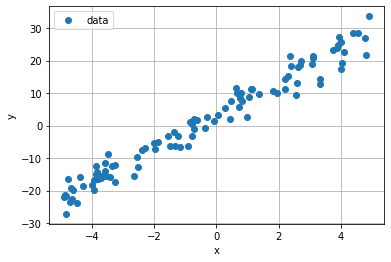

In [2]:
x = 10*np.random.rand(100)-5
noise = 3*np.random.randn(x.shape[0])
y = 5*x + 3 + noise
plt.plot(x, y, marker="o", lw= 0, label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

Our goal is to find a linear function model (equation) that can fit the x-y dataset well.

Instead of using PyTorch, we can simply use `np.polyfit()` to fit the dataset. Then we can obtain the fitting parameters of $w$ and $b$ of a linear function of $y = wx + b$, where $w$ and $b$ are called weight and bias, respectively.

In [3]:
w, b = np.polyfit(x, y, 1)
print(f"w={w:.3f}, b={b:.3f}")

w=5.073, b=3.143


Because the x-y dataset contains some noise, obtained $w$ and $b$ are not exactly same as we used for creating the dataset, but they are close enough. Anyway we can make a fitting line with the obtained parameters of $w$ and $b$.

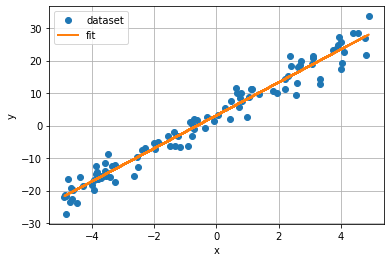

In [5]:
y_fit = w*x + b

plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, y_fit, lw=2, label="fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

So `np.polyfit()` works very well. But in this example we will do the same thing with PyTorch.

Now we convert the dataset of $x$ and $y$ into PyTorch Tensor.

In [6]:
x = torch.tensor(x)
y = torch.tensor(y)

print(type(x))
print(type(y))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


Then we define a function named `model()` that predicts an output value of $y$ from an input value of $x$ with the parameters of $w$ and $b$.

In [7]:
def model(x):
    return w*x + b

Also we define a function named `loss_func()` to calculate the mean squared error between $p$ and $y$, where $p$ is the output values, i.e. prediction, of the `model()`. This kind of function is called loss function which can be used for measuring how wrong the model prediction was.

$\displaystyle \mathrm{loss} = \mathrm{mse}(p, y) = \frac{1}{N}\sum_{i=0}^{N-1}(p_i-y_i)^2$

In [8]:
def loss_func(p, y):
    return ((p-y)**2).mean()

At this point we don't know what $w$ and $b$ are. So we initialize those values with arbitary numbers.

In [9]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

Now we can make a prediction using `model()`

In [10]:
p = model(x)
print(p)

tensor([-0.4471, -4.1988, -6.5659, -8.5372, -2.4041, -2.2799, -4.2380, -6.3197,
        -4.0032, -8.2665, -5.2995, -1.1188, -7.6434, -8.2637, -4.7207, -5.3545,
        -0.2189, -9.6219, -9.8868, -0.9640, -3.9529, -9.6338, -0.0997, -1.8966,
        -0.9966, -0.1999, -3.8496, -8.8201, -4.3721, -9.2755, -4.5272, -1.0544,
        -0.8854, -6.4982, -6.8626, -2.7122, -2.3097, -7.5199, -9.8451, -1.6644,
        -9.8768, -0.6079, -5.9226, -7.3878, -2.8043, -8.7010, -8.4239, -7.3090,
        -9.3918, -8.8286, -8.6325, -8.9370, -8.8297, -7.0216, -4.9396, -5.8633,
        -5.7338, -4.5638, -8.8596, -5.7176, -8.9954, -2.6116, -3.0568, -1.6571,
        -2.7899, -4.3453, -6.3695, -1.8974, -2.3705, -6.2501, -3.1930, -2.6470,
        -9.6699, -7.5389, -8.5926, -6.9739, -8.8805, -1.2556, -5.7971, -3.6229,
        -8.9311, -8.3437, -4.1651, -4.2784, -0.9908, -5.7850, -9.8270, -9.4896,
        -9.7614, -1.0879, -2.4393, -5.6310, -9.7078, -5.0878, -8.4812, -3.8793,
        -1.9287, -8.5730, -6.1744, -8.75

Let's visualize current prediction. As we set arbitary number for $w$ and $b$, the model prediction does not fit the data well for sure.

Text(0, 0.5, 'y')

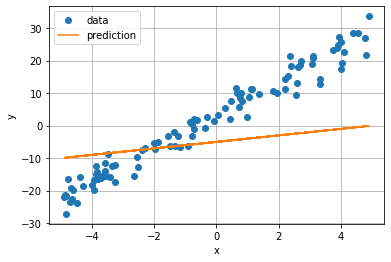

In [11]:
plt.plot(x, y, marker="o", lw=0, label="data")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Then we calculate loss (mean squared error) value by using `loss_func()`. Note that the loss value is very large because $w$ and $b$ are arbitaly values and not optimized yet.

In [12]:
loss = loss_func(p, y)
print(loss)

tensor(199.2098, dtype=torch.float64, grad_fn=<MeanBackward0>)


In order to optimize $w$ amd $b$, we need to know the gradients of loss respect to current $w$ and $b$ respectively. This can be done with `loss.backward()`. The gradients of $ \frac{\partial \mathrm{loss}}{\partial w}$ and $\frac{\partial \mathrm{loss}}{\partial b}$ can be accessed by `w.grad` and `b.grad`, respectively.

In [13]:
loss.backward()
print(w.grad)
print(b.grad)

tensor(-68.8796)
tensor(-12.4153)


Then we can update $w$ and $b$ by using equations below where $\eta$ is learning rate. This is a method called stochastic gradient descent (SGD).

$\displaystyle w := w - \eta\frac{\partial}{\partial w}\mathrm{loss}$

$\displaystyle b := b - \eta\frac{\partial}{\partial b}\mathrm{loss}$


When we update those values we don't want to calculate the gradients. For this purpose `with torch.no_grad()` is stated at the beginning.

In [14]:
lr = 0.01    # define learning rate

with torch.no_grad():    # disable gradients calculations
    w -= w.grad*lr       # update w
    b -= b.grad*lr       # update b

At this point you can find the values of $w$ and $b$ are a bit closer to the true values ($w$=5.0, $b$=3.0) than the initial values.

In [15]:
print(w)
print(b)

tensor(1.6888, requires_grad=True)
tensor(-4.8758, requires_grad=True)


In order to optimize $w$ and $b$ further, we repeat above process many times.

In [16]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

lr = 0.01    # learning rate 
epochs = 50  # how many times we repeat training

w = torch.tensor(3.0, requires_grad=True)    # initialize w
b = torch.tensor(-1.0, requires_grad=True)   # initialize b

# empty lists for saving loss, w, b
loss_list = []
w_list = []
b_list = []

for epoch in range(epochs):

    p = model(x)              # prediction
    loss = loss_func(p, y)    # measure loss
    loss.backward()           # determine gradients

    with torch.no_grad():     # disable autograd
        w -= w.grad*lr        # update w 
        b -= b.grad*lr        # update b
        
        w.grad.zero_() # reset gradient
        b.grad.zero_() # reset gradient

    # save loss, w, b
    loss_list.append(loss.item())
    w_list.append(w.item())
    b_list.append(b.item())

    print(f"Epoch {epoch+1}, loss={loss.item():.3f}, w={w.item():.3f}, b={b.item():.3f}")

Epoch 1, loss=57.811, w=3.351, b=-0.937
Epoch 2, loss=46.260, w=3.636, b=-0.872
Epoch 3, loss=38.451, w=3.868, b=-0.805
Epoch 4, loss=33.112, w=4.057, b=-0.737
Epoch 5, loss=29.408, w=4.211, b=-0.670
Epoch 6, loss=26.786, w=4.337, b=-0.601
Epoch 7, loss=24.885, w=4.440, b=-0.534
Epoch 8, loss=23.464, w=4.524, b=-0.466
Epoch 9, loss=22.367, w=4.593, b=-0.399
Epoch 10, loss=21.488, w=4.650, b=-0.333
Epoch 11, loss=20.759, w=4.696, b=-0.267
Epoch 12, loss=20.135, w=4.735, b=-0.203
Epoch 13, loss=19.585, w=4.767, b=-0.139
Epoch 14, loss=19.090, w=4.793, b=-0.076
Epoch 15, loss=18.636, w=4.815, b=-0.015
Epoch 16, loss=18.213, w=4.834, b=0.046
Epoch 17, loss=17.816, w=4.849, b=0.106
Epoch 18, loss=17.441, w=4.862, b=0.164
Epoch 19, loss=17.084, w=4.874, b=0.222
Epoch 20, loss=16.744, w=4.883, b=0.278
Epoch 21, loss=16.419, w=4.892, b=0.334
Epoch 22, loss=16.107, w=4.899, b=0.388
Epoch 23, loss=15.808, w=4.906, b=0.442
Epoch 24, loss=15.521, w=4.912, b=0.494
Epoch 25, loss=15.246, w=4.917, b=

Now you see $w$ is close to 5.0 and $b$ is close to 3.0.

Let's visualize how the loss value decreased.

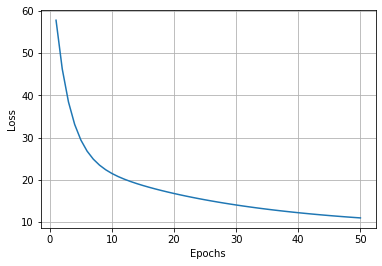

In [17]:
plt.plot(np.arange(epochs)+1, loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

Let's visualize how the `w` value updated with epochs.

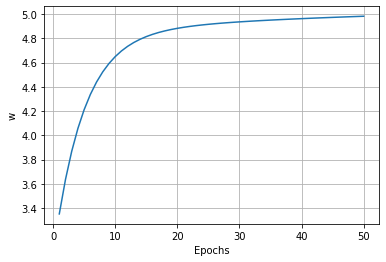

In [18]:
plt.plot(np.arange(epochs)+1, w_list)
plt.xlabel("Epochs")
plt.ylabel("w")
plt.grid()

Let's visualize how the `b` value updated with epochs.

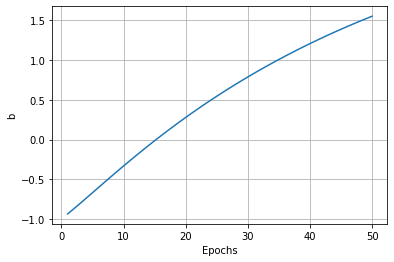

In [19]:
plt.plot(np.arange(epochs)+1, b_list)
plt.xlabel("Epochs")
plt.ylabel("b")
plt.grid()

Text(0, 0.5, 'y')

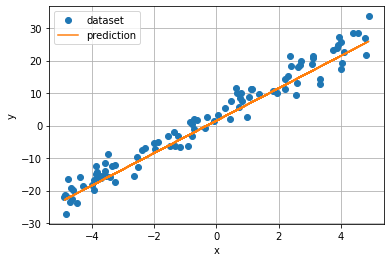

In [20]:
plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Now you can try to change initial values of `epochs`, `lr`, `w`, `b` etc. and see what happens.